In [2]:
## Loading dataset
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
## Exploring dataset (dataset = dictionary)
boston.keys()
#print (boston.DESCR)
boston.data.shape

(506, 13)

In [5]:
## Converting boston.data in pandas-df
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
## Data Processing Part
# Renaming columns (only numbers) in original names
# Adding Price as target variable
bos.columns = boston.feature_names
bos['Price'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Linear Regression with Scikit Learn

* Y = boston housing price (also called “target” data in Python)
* X = all the other features (or independent variables)
<br>

In order to see inside the regression object, press <Tab> key
Important functions to keep in mind while fitting a linear regression model:
* lm.fit() --> fits a linear model
* lm.predict() --> predict Y using the linear model with estimated coefficients
* lm.score() --> returns the coefficient of determination (R^2)
* lm.coef_ --> gives the coefficients and .intercept_ gives the estimated intercepts

In [7]:
# Importing library + defining parameters
from sklearn.linear_model import LinearRegression
X = bos.drop('Price', axis = 1)
Y = bos['Price']

# This creates a LinearRegression object
lm = LinearRegression()

In [8]:
# Fitting the LinearRegression + printing out coefficients
lm.fit(X, Y)
print ('Estimated intercept:', lm.intercept_)
print ('Number of coefficients:', len(lm.coef_))

Estimated intercept: 36.49110328036112
Number of coefficients: 13


In [9]:
# Constructing DataFrame containing features (columns) and estimated coefficients
df_new = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])
df_new.head()

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759


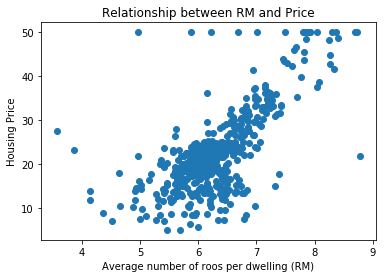

In [17]:
# Plotting True housing prices and True RM
plt.scatter(bos.RM, Y)
plt.xlabel('Average number of roos per dwelling (RM)')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and Price')
plt.show()

# As you can see that there is a positive correlation between RM 
# and housing prices.

In [20]:
# Predicting Prices
prediction = lm.predict(X)

Text(0.5,1,'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

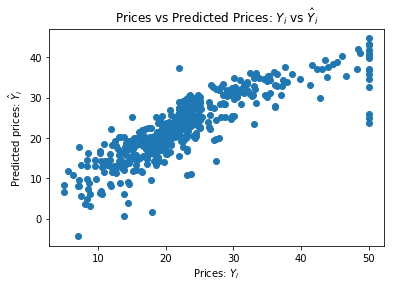

In [22]:
# Scatter plot to compare true prices and predicted prices
plt.scatter(Y, prediction)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices: $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$')

# You can notice that there is some error in  the prediction as 
# the housing prices increase.

In [24]:
# Mean squared error (OLS)
mseFull = np.mean((Y - lm.predict(X))**2)
print (mseFull)

21.897779217687496


#### Splitting in Training and Test set
You can create training and test data sets manually, but this is not the right way to do, because you may be training your model on less expensive houses and testing on expensive houses.

You have to divide your data sets randomly. Scikit learn provides a function called train_test_split to do this.

In [ ]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)